In [1]:
import Ouzo_Sampling_Wtf_Lattice_Volume as create
import OT2_Ouzo_Commands as ot2_commands
import Ouzo_Graph_Tools as ouzo_graphs
from opentrons import simulate, execute, protocol_api
import pandas as pd
import numpy as np

C:\Users\Edwin\.opentrons\deck_calibration.json not found. Loading defaults
C:\Users\Edwin\.opentrons\robot_settings.json not found. Loading defaults


Loading json containers...
Json container file load complete, listing database
Found 0 containers to add. Starting migration...
Database migration complete!


In [2]:
experiment_dict = create.get_experiment_plan(r"C:\Users\Edwin\Desktop\OT2Protocols\ot2protocol\Ouzo_OT2_Sampling\Testing Plans\Testing_Example.csv")
wtf_sample_canidates = create.generate_candidate_lattice_concentrations(experiment_dict, filter_one=True)
# stock_canidates = create.generate_candidate_lattice_stocks(experiment_dict) # just make it one step
# stock_canidates, stock_text = create.prepare_stock_search(stock_canidates, experiment_dict, wtf_sample_canidates)
# ouzo_graphs.stock_search(experiment_dict, wtf_sample_canidates, stock_canidates, stock_text)

In [3]:
volume_canidates = create.calculate_ouzo_volumes(wtf_sample_canidates, experiment_dict) # this is where you can iterate through a range of stocks and present different sets of possible volumes
filtered_wtf_samples, filtered_volume_samples = create.filter_samples(wtf_sample_canidates, volume_canidates, 30, 1000)
rearranged_samples_volumes = create.rearrange(filtered_volume_samples)
print('Total number of samples =',len(filtered_wtf_samples))
for i, stock_volumes in enumerate(rearranged_samples_volumes):
    print(sum(stock_volumes)/1000, 'mL of ' + experiment_dict['Stock Names'][i] )

Min sample volume = 1525.8009790077017uL Max sample volume = 1528.1031052168223uL
Total number of samples = 19
1.995000115829706 mL of dppc-stock
1.3299988874559305 mL of dspe-peg-stock
4.441966893865627 mL of ethanol-PFH-Stock
4.425297976009952 mL of ethanol-stock
16.81982492697176 mL of water-stock


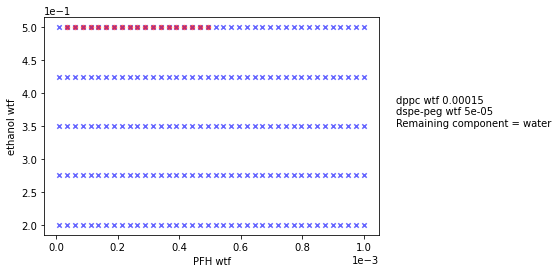

In [4]:
# since autoscaled do not plot sample list with blank
ouzo_graphs.graph_canidates(experiment_dict, wtf_sample_canidates, filtered_wtf_samples) # add log/scinot, exclude blank by -1 on len

In [5]:
# Optional addition of blank samples to sample volumes
average_vol = create.average_volume(filtered_volume_samples)
filtered_wtf_samples_b, filtered_volume_samples_b = create.add_blank(filtered_wtf_samples, filtered_volume_samples,average_vol, experiment_dict['Blank Component Concentrations'])

In [9]:
test = filtered_volume_samples_b
test[0:3]

array([[105.0000061 ,  69.99994145,  31.35345667, 433.78876272,
        885.65881207],
       [105.0000061 ,  69.99994145,  53.84615385, 411.46894684,
        885.61382668],
       [105.0000061 ,  69.99994145,  76.33885102, 389.14913096,
        885.56884129]])

In [11]:
protocol = simulate.get_protocol_api('2.0')
information = ot2_commands.run(protocol, experiment_dict, filtered_volume_samples_b, transfer_volume=30, n_transfer_plates=1)
# sort of working not really - fails when having to return tip - if cant figure out quickly just plan for experiment in crude way

C:\Users\Edwin\.opentrons\deck_calibration.json not found. Loading defaults
C:\Users\Edwin\.opentrons\robot_settings.json not found. Loading defaults


Picking up tip from A1 of Opentrons 96 Tip Rack 300 µL on 4
Transferring 105.00000609630035 from A1 of Corning 96 Well Plate 360 µL Flat on 1 to A1 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 105.00000609630035 uL from A1 of Corning 96 Well Plate 360 µL Flat on 1 at 1.0 speed
Dispensing 105.00000609630035 uL into A1 of Corning 96 Well Plate 360 µL Flat on 2 at 1.0 speed
Transferring 105.00000609630035 from A1 of Corning 96 Well Plate 360 µL Flat on 1 to A2 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 105.00000609630035 uL from A1 of Corning 96 Well Plate 360 µL Flat on 1 at 1.0 speed
Dispensing 105.00000609630035 uL into A2 of Corning 96 Well Plate 360 µL Flat on 2 at 1.0 speed
Transferring 105.00000609630035 from A1 of Corning 96 Well Plate 360 µL Flat on 1 to A3 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 105.00000609630035 uL from A1 of Corning 96 Well Plate 360 µL Flat on 1 at 1.0 speed
Dispensing 105.00000609630035 uL into A3 of Corning 96 Well Plate 360 

In [ ]:
create.create_csv(r"C:\Users\Edwin\Desktop\cmonwidg", information, filtered_wtf_samples_b, experiment_dict)
df = pd.read_csv(r"C:\Users\Edwin\Desktop\cmonwidg")

In [ ]:
df